In [1]:
import os, zipfile
import pandas as pd
import seaborn as sns
import SimpleITK as sitk
from radiomics import featureextractor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# feature extraction
params = os.path.join(os.getcwd(), '..', 'examples', 'exampleSettings', 'Params.yaml')

extractor = featureextractor.RadiomicsFeatureExtractor(params)

features = {}

for case_id in range(1,101):

    path_image = '/home/tianyu/Desktop/data_base/imagesTr_cropped4/data/'
    path_mask = '/home/tianyu/Desktop/data_base/imagesTr_cropped4/mask/'
    image = sitk.ReadImage(path_image + f"testdata{case_id}.nrrd")
    mask = sitk.ReadImage(path_mask + f"testdata{case_id}.nrrd")

    features[case_id] = extractor.execute (image, mask, label=1)
    print(f'case {case_id} done')

print(features[1].keys())  
print(features[1].values())

df = pd.DataFrame(features)

case 1 done
case 2 done
case 3 done
case 4 done
case 5 done
case 6 done
case 7 done
case 8 done
case 9 done
case 10 done
case 11 done
case 12 done
case 13 done
case 14 done
case 15 done
case 16 done
case 17 done
case 18 done
case 19 done
case 20 done
case 21 done
case 22 done
case 23 done
case 24 done
case 25 done
case 26 done
case 27 done
case 28 done
case 29 done
case 30 done
case 31 done
case 32 done
case 33 done
case 34 done
case 35 done
case 36 done
case 37 done
case 38 done
case 39 done
case 40 done
case 41 done
case 42 done
case 43 done
case 44 done
case 45 done
case 46 done
case 47 done
case 48 done
case 49 done
case 50 done
case 51 done
case 52 done
case 53 done
case 54 done
case 55 done
case 56 done
case 57 done
case 58 done
case 59 done
case 60 done
case 61 done
case 62 done
case 63 done
case 64 done
case 65 done
case 66 done
case 67 done
case 68 done
case 69 done
case 70 done
case 71 done
case 72 done
case 73 done
case 74 done
case 75 done
case 76 done
case 77 done
case 78 

In [5]:
# preprocessing of feature
# now, only single two step for preprocessing
# 1. get only different keys with value betwean M label graph and B label graph
# 2. delete the first ten keys which is not relevent to cancer structure
# 3. todo

import numpy as np

# M label and B label graph feature
dict1 = features[1]
dict2 = features[2]

different_values_keys = []

for key1, value1 in dict1.items():
    if key1 in dict2 and dict2[key1] != value1:
        different_values_keys.append(key1)
        
different_values_keys = np.array(different_values_keys)        
different_values_keys = different_values_keys[10:]
    
print(different_values_keys)
print(np.size(different_values_keys))

['original_shape_Elongation' 'original_shape_Flatness'
 'original_shape_LeastAxisLength' 'original_shape_MajorAxisLength'
 'original_shape_Maximum2DDiameterColumn'
 'original_shape_Maximum2DDiameterRow'
 'original_shape_Maximum2DDiameterSlice'
 'original_shape_Maximum3DDiameter' 'original_shape_MeshVolume'
 'original_shape_MinorAxisLength' 'original_shape_Sphericity'
 'original_shape_SurfaceArea' 'original_shape_SurfaceVolumeRatio'
 'original_shape_VoxelVolume' 'original_firstorder_10Percentile'
 'original_firstorder_90Percentile' 'original_firstorder_Energy'
 'original_firstorder_Entropy' 'original_firstorder_InterquartileRange'
 'original_firstorder_Kurtosis' 'original_firstorder_Maximum'
 'original_firstorder_MeanAbsoluteDeviation' 'original_firstorder_Mean'
 'original_firstorder_Median' 'original_firstorder_Minimum'
 'original_firstorder_Range'
 'original_firstorder_RobustMeanAbsoluteDeviation'
 'original_firstorder_RootMeanSquared' 'original_firstorder_Skewness'
 'original_firstor

In [6]:
# get the remain feature and change it to pd

filtered_dicts_main = []
for item in range(1,101):
    filtered_dicts = []
    for d in different_values_keys:
        filtered_dict = features[item][d]
        filtered_dicts.append(filtered_dict)
    filtered_dicts_main.append(filtered_dicts)

df_data = pd.DataFrame(filtered_dicts_main)

print(df_data)

          0         1          2           3                   4   \
0   0.324081  0.113919  25.257430  221.713679  114.43775600735974   
1   0.891822  0.182954  11.288263   61.700028   61.07372593840988   
2   0.720290  0.183258  34.497578  188.245972   178.4740877550576   
3   0.456011  0.197963  36.007521  181.890080  114.35471131527551   
4   0.470130  0.136238  11.214203   82.313115   50.15974481593781   
..       ...       ...        ...         ...                 ...   
95  0.730329  0.334139  19.469018   58.266271  53.150729063673246   
96  0.475731  0.149063   9.368722   62.850815  40.049968789001575   
97  0.365802  0.137073  12.274079   89.544244   47.67598976424087   
98  0.347169  0.120344  17.560283  145.917241   65.00769185258002   
99  0.607728  0.239909  18.183293   75.792584   61.29437168288782   

                    5                   6                   7   \
0    254.3855341799136  227.00220263248548   257.8410362994999   
1    74.33034373659252   76.05918747922

In [7]:
# inport csv
df = pd.read_csv('/home/tianyu/Desktop/MedicalDataBase/Taskfirst/labels.csv')

df_label = df['label'].values
df_label_num = []

for item in df_label:
    if item == 'M':
        df_label_num.append(0)
    else :
        df_label_num.append(1)
        
print(df_label_num)

        

[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]


In [8]:
# logic regression
X = df_data
y = df_label_num

# data cut
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model train
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.coef_)

# model pred
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

# show accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")


[[ 1.09904610e-11  3.13219913e-12  1.63424805e-10  3.68178449e-10
   9.13819019e-10  1.66194408e-10  3.72183894e-10  5.15950481e-10
   7.74022524e-08  7.13818709e-10  4.00095654e-12  1.75157864e-07
   6.17123503e-12  7.83285838e-08  3.94090244e-10  8.45996104e-10
  -1.49285364e-10  1.78188663e-11  2.43516352e-10  6.29326557e-11
   1.99754897e-09  1.51175622e-10  6.02328354e-10  5.69114449e-10
   8.27202358e-11  1.91482873e-09  1.00775852e-10  6.34310287e-10
   1.31253382e-11 -1.49285364e-10  3.97500362e-12  3.34195236e-09
   8.67606927e-11  3.06534458e-11  9.62560078e-11  2.71655357e-11
   1.52188901e-11  7.81478862e-12  5.11876269e-12  5.82675305e-12
   1.36643973e-11  4.35273033e-12  1.97553918e-12  3.25309657e-11
  -1.25222768e-12  5.80588188e-12  8.19747688e-12  1.07881979e-11
   8.29965577e-12  1.02643410e-11  4.37995239e-12  3.21613353e-12
   2.45537883e-11  5.75841967e-12  5.99048954e-08  3.74116074e-12
   7.39951961e-12  1.07709840e-10  1.14686970e-10  6.83078059e-10
   2.24034

In [24]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

clf = RandomForestClassifier(n_estimators=20000, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)


[0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1]
[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]
0.75


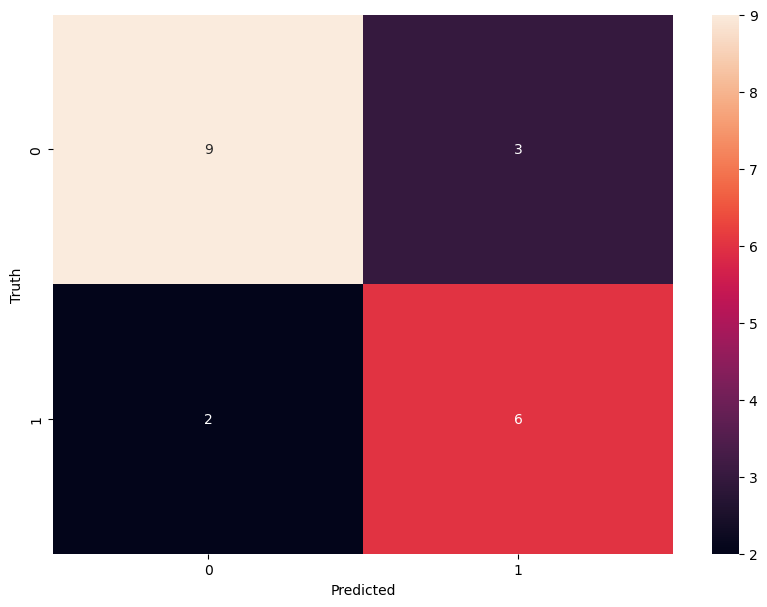

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# 使用 seaborn 来可视化混淆矩阵
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


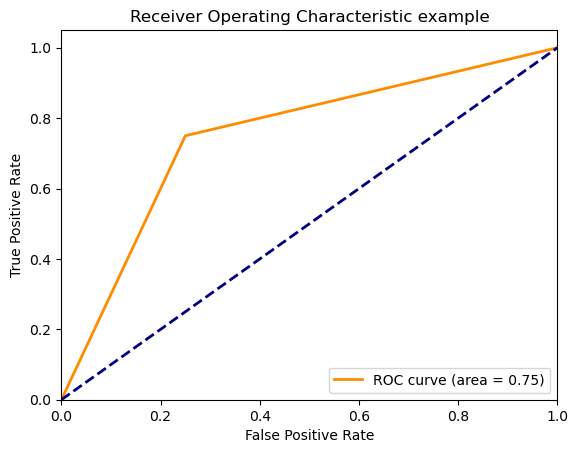

In [26]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()
